In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [5]:
cd /BioII/lulab_b/jinyunfan/projects/terminator-prediction/performance-evaluation

/BioII/lulab_b/jinyunfan/projects/terminator-prediction/performance-evaluation


In [12]:
#output/BATTER/test-set/performance/B.B.non.primary.RIT.txt 
records = []
for a in ["BATTER","RNIE","transterm","BS-RUT","mvRDT","rhotermpred"]:
    for m in ["RIT","RDT","others"]:
        for s in ["B.B","B.S","E.C","M.T"]:
            for t in ["non.primary","primary"]:
                path = f"output/{a}/test-set/performance/{s}.{t}.{m}.extended.txt"
                if not os.path.exists(path):
                    path = f"output/{a}/test-set/performance/{s}.{t}.{m}.extended.200.txt"
                score = float(open(path).read().split("\n")[1].split("\t")[1])
                if score == 1:
                    score = 0
                records.append((a,m,s,t,score))
table = pd.DataFrame.from_records(records)
table.columns = ["method","category","species","type","recall"]   
rename = {"E.C":"E. coli","B.S":"B. subtilis","M.T":"M. tuberculosis","B.B":"B. burgdorferi"}
species = CategoricalDtype(categories=list(rename.keys()),
                      ordered=True)
table["species"] = table["species"].astype(species)
table.sort_values(by="species")
table["species"] = table["species"].map(lambda x:rename[x])

In [13]:
table["method"].unique()

array(['BATTER', 'RNIE', 'transterm', 'BS-RUT', 'mvRDT', 'rhotermpred'],
      dtype=object)

In [14]:
rename_methods = {"BATTER":"BATTER-TPE","BS-RUT":"BATTER-RUT","rhotermpred":"RhoTermPredict","mvRDT":"RDT111-OPLS-DA"}

In [15]:
table["method"] = table["method"].map(lambda x:rename_methods.get(x,x))

In [16]:
primary_table = table[table["type"] == "primary"]

In [18]:
pwd

'/BioII/lulab_b/jinyunfan/projects/terminator-prediction/performance-evaluation'

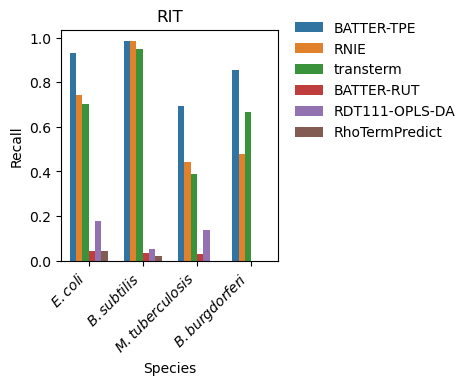

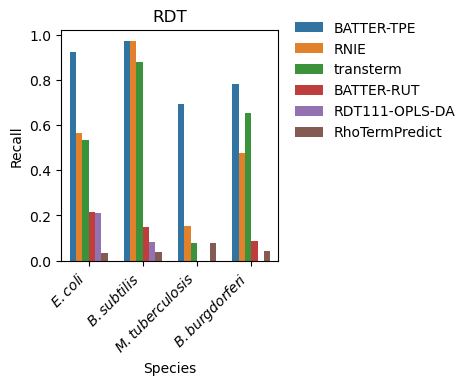

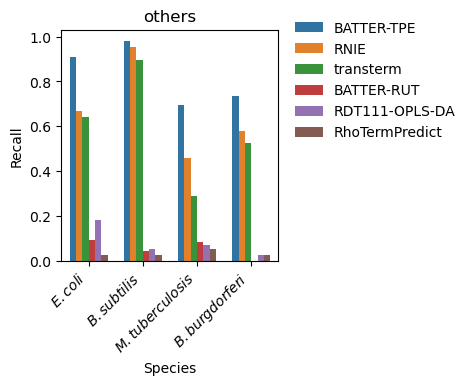

In [22]:
for c in ["RIT","RDT","others"]:
    fig, ax = plt.subplots(figsize=(2.8,3))
    subset = primary_table[primary_table["category"] == c]
    sns.barplot(data=subset,hue="method",x="species",y="recall",width=0.7) #,edgecolor="#999999"
    _ = ax.set_xticklabels(["$" + x.get_text() + "$" for x in ax.get_xticklabels()],weight="bold")
    plt.legend(loc=(1.05,0.5),frameon=False)
    #ax.set_ylim([-0.01,1])
    plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45,ha="right")
    _ = ax.set_ylabel("Recall")
    ax.set_xlabel("Species")
    ax.set_title(c)
    plt.savefig(f"figures/test-set-{c}-performance-extended.pdf",bbox_inches="tight")

In [20]:
nonprimary_table = table[table["type"] == "non.primary"]

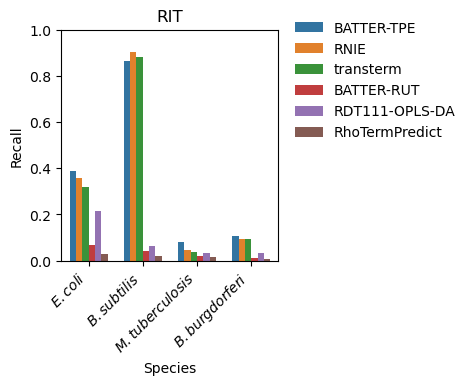

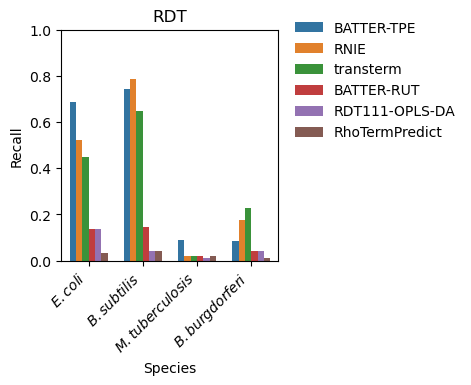

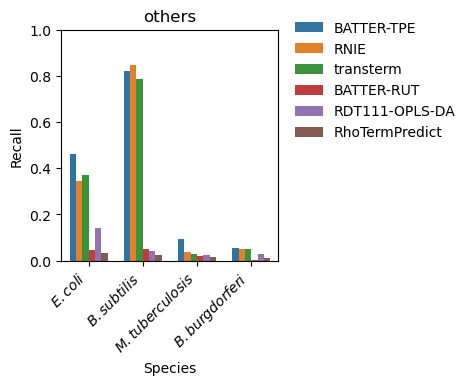

In [23]:
for c in ["RIT","RDT","others"]:
    fig, ax = plt.subplots(figsize=(2.8,3))
    subset = nonprimary_table[nonprimary_table["category"] == c]
    sns.barplot(data=subset,hue="method",x="species",y="recall",width=0.7)
    _ = ax.set_xticklabels(["$" + x.get_text() + "$" for x in ax.get_xticklabels()],weight="bold")
    plt.legend(loc=(1.05,0.5),frameon=False)
    plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45,ha="right")
    _ = ax.set_ylabel("Recall")
    ax.set_xlabel("Species")
    ax.set_title(c)
    ax.set_ylim([0,1])
    plt.savefig(f"figures/test-set-{c}-nonprimary-performance-extended.pdf",bbox_inches="tight")

In [667]:
rename_methods

{'BATTER': 'BATTER-TPE',
 'BS-RUT': 'BATTER-RUT',
 'rhotermpred': 'RhoTermPredict',
 'mvRDT': 'RDT111-OPLS-DA'}

In [24]:
method2color = {"BATTER-RUT":"#C03A3A","RDT111-OPLS-DA":"#9371B2","RhoTermPredict":"#835B53"}

output/mvRDT/test-set/E.C.ROC.txt
output/BS-RUT/test-set/E.C.ROC.txt
output/rhotermpred/test-set/E.C.ROC.txt
output/mvRDT/test-set/B.S.ROC.txt
output/BS-RUT/test-set/B.S.ROC.txt
output/rhotermpred/test-set/B.S.ROC.txt
output/mvRDT/test-set/B.B.ROC.txt
output/BS-RUT/test-set/B.B.ROC.txt
output/rhotermpred/test-set/B.B.ROC.txt
output/mvRDT/test-set/M.T.ROC.txt
output/BS-RUT/test-set/M.T.ROC.txt
output/rhotermpred/test-set/M.T.ROC.txt


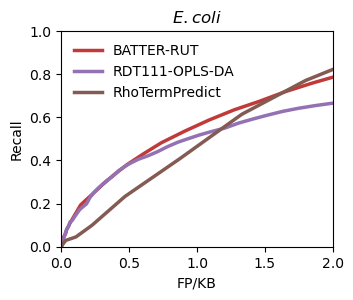

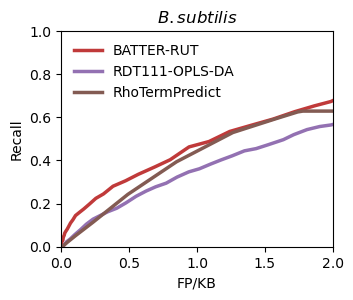

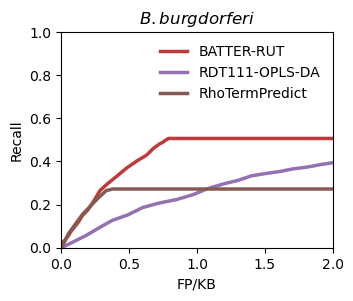

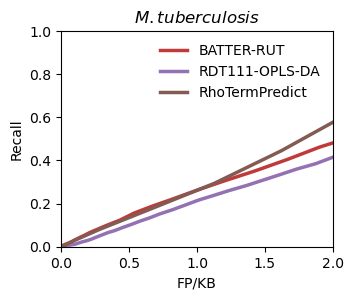

In [25]:
species = ["E.C","B.S","B.B","M.T"]

#  for s in species:
for s in species:
    tables = {}
    for a in ["mvRDT","BS-RUT","rhotermpred"]:  
        path = f"output/{a}/test-set/{s}.ROC.txt"
        print(path)
        table = pd.read_csv(path,sep="\t",header=None)
        table.columns = ["FPR","TPR","threshold"]
        tables[a] = table
    fig, ax = plt.subplots(figsize=(3.5,2.8))
    for a in ['BS-RUT', 'mvRDT', 'rhotermpred']:
        table = tables[a]
        table = table.sort_values(by="threshold",ascending=False)
        x = [0] + list(table["FPR"].values) 
        y = [0] + list(table["TPR"].values) 
        if max(x) < 2:
            x = x + [2]
            y = y + [y[-1]]
        ax.plot(x ,y ,label=rename_methods[a], linewidth=2.5,color=method2color[rename_methods[a]])
    ax.set_ylabel("Recall")        
    ax.set_xlabel("FP/KB")
    plt.legend(frameon=False)    
    ax.set_xlim([0,2])
    ax.set_ylim([0,1])
    ax.set_title("$" + rename[s] + "$")
    plt.savefig(f"figures/RUT-prediction-performance-{s}.pdf",bbox_inches="tight")

In [132]:
def load_coverage(sites,RUT,contig,cutoff):
    fwd_coverage = {}
    rev_coverage = {}
    lengths = {}
    with open(contig) as f:
        for line in f:
            fields = line.strip().split("\t")
            seq_id, length = fields[:2]
            length = int(length)
            lengths[seq_id] = length
    i = 0
    intervals = []
    with open(RUT) as f:
        for line in f:
            i += 1
            fields = line.strip().split("\t")
            seq_id, start, end, name, score, strand = fields[:6]
            score = float(score)
            #if score < cutoff:
            #    continue
            start, end = int(start), int(end)
            intervals.append((seq_id, start,end,score,strand))
    intervals = sorted(intervals,key=lambda x:-x[-2])[:max(int(len(intervals)/3),3000)]
    for seq_id, start,end,score,strand in intervals:
        if strand == "+":
            if seq_id not in fwd_coverage:
                fwd_coverage[seq_id] = np.zeros(lengths[seq_id])
            fwd_coverage[seq_id][start:end] += 1
        elif strand == "-":
            if seq_id not in rev_coverage:
                rev_coverage[seq_id] = np.zeros(lengths[seq_id])
            rev_coverage[seq_id][start:end] += 1
    meta_coverage = np.zeros(350)
    with open(sites) as f:
        for line in f:
            if "concordant" not in line:
                continue
            if "downstream" not in line:
                continue
            fields = line[:-1].split("\t")
            position = int(fields[1])
            seq_id = fields[0]
            
            if fields[5] == "+":
                if seq_id not in fwd_coverage:
                    continue
                if (position > 100) and (position < len(fwd_coverage[seq_id])-250):
                    meta_coverage += fwd_coverage[seq_id][position-100:position+250]
            else:
                if seq_id not in rev_coverage:
                    continue
                if (position > 250) and (position < len(rev_coverage[seq_id])-100):
                    meta_coverage += rev_coverage[seq_id][position-250:position+100][::-1]
    return meta_coverage

(-100.0, 250.0)

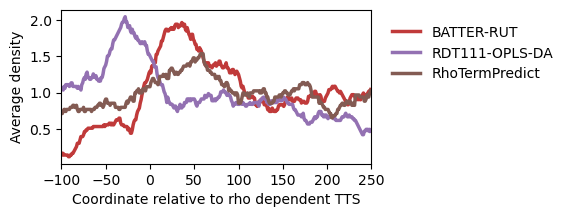

In [133]:
sepcies = "E.C"
contig = f"dataset/genome/refseq/test-genomes/{sepcies}.fna.fai"
sites = f"dataset/term-seq/test-set/primary/{sepcies}.txt"

fig, ax = plt.subplots(figsize=(4,2))

# FPR of 0.5/KB
RUT = f"output/BS-RUT/test-set/{sepcies}.bed"
cutoff = 1.3
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["BS-RUT"],linewidth=2.5,color="#C03A3A")

RUT = f"output/mvRDT/test-set/{sepcies}.bed"
RUT = f"output/mvRDT/test-set/{sepcies}.unslopped.bed"
cutoff = 0.4715
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["mvRDT"],linewidth=2.5,color="#9371B2")

RUT = f"output/rhotermpred/test-set/{sepcies}.bed"
cutoff = 11
#cutoff = 12
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["rhotermpred"],linewidth=2.5,color="#835B53")

plt.legend(loc=(1.05,0.5),frameon=False)
ax.set_ylabel("Average density")
ax.set_xlabel("Coordinate relative to rho dependent TTS")
#ax.set_ylim([0,2.5])
ax.set_xlim([-100,250])

#plt.savefig("figures/E.C-predicted-near-TTS.pdf",bbox_inches="tight")

(-100.0, 250.0)

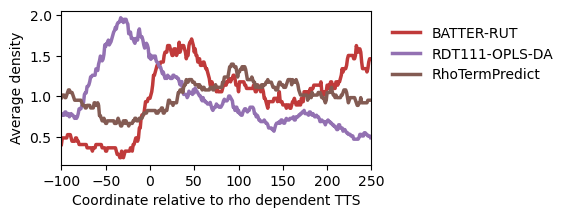

In [134]:
sepcies = "B.S"
contig = f"dataset/genome/refseq/test-genomes/{sepcies}.fna.fai"
sites = f"dataset/term-seq/test-set/primary/{sepcies}.txt"

fig, ax = plt.subplots(figsize=(4,2))

RUT = f"output/BS-RUT/test-set/{sepcies}.bed"
cutoff = 1.5
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["BS-RUT"],linewidth=2.5,color="#C03A3A")

RUT = f"output/mvRDT/test-set/{sepcies}.bed"
RUT = f"output/mvRDT/test-set/{sepcies}.unslopped.bed"
cutoff = 0.6
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["mvRDT"],linewidth=2.5,color="#9371B2")

RUT = f"output/rhotermpred/test-set/{sepcies}.bed"
cutoff = 11
#cutoff = 12
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["rhotermpred"],linewidth=2.5,color="#835B53")

plt.legend(loc=(1.05,0.5),frameon=False)
ax.set_ylabel("Average density")
ax.set_xlabel("Coordinate relative to rho dependent TTS")
#ax.set_ylim([0,2.5])
ax.set_xlim([-100,250])

#plt.savefig(f"figures/{sepcies}-predicted-near-TTS.pdf",bbox_inches="tight")

(-100.0, 250.0)

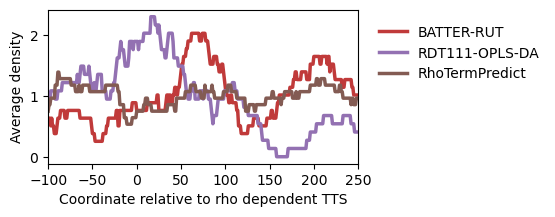

In [135]:
sepcies = "M.T"
contig = f"dataset/genome/refseq/test-genomes/{sepcies}.fna.fai"
sites = f"dataset/term-seq/test-set/primary/{sepcies}.txt"

fig, ax = plt.subplots(figsize=(4,2))

RUT = f"output/BS-RUT/test-set/{sepcies}.bed"
cutoff = 1.1
cutoff = 1
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["BS-RUT"],linewidth=2.5,color="#C03A3A")

RUT = f"output/mvRDT/test-set/{sepcies}.bed"
RUT = f"output/mvRDT/test-set/{sepcies}.unslopped.bed"
cutoff = 0.61
cutoff = 0.5
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["mvRDT"],linewidth=2.5,color="#9371B2")

RUT = f"output/rhotermpred/test-set/{sepcies}.bed"
cutoff = 8
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["rhotermpred"],linewidth=2.5,color="#835B53")

plt.legend(loc=(1.05,0.5),frameon=False)
ax.set_ylabel("Average density")
ax.set_xlabel("Coordinate relative to rho dependent TTS")
#ax.set_ylim([0,3])
ax.set_xlim([-100,250])

#plt.savefig(f"figures/{sepcies}-predicted-near-TTS.pdf",bbox_inches="tight")

(-100.0, 250.0)

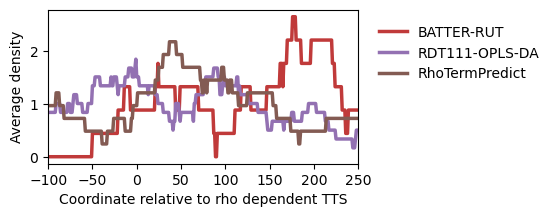

In [136]:
sepcies = "B.B"
contig = f"dataset/genome/refseq/test-genomes/{sepcies}.fna.fai"
sites = f"dataset/term-seq/test-set/primary/{sepcies}.txt"

fig, ax = plt.subplots(figsize=(4,2))

RUT = f"output/BS-RUT/test-set/{sepcies}.bed"
cutoff = 1.2
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["BS-RUT"],linewidth=2.5,color="#C03A3A")

RUT = f"output/mvRDT/test-set/{sepcies}.bed"
RUT = f"output/mvRDT/test-set/{sepcies}.unslopped.bed"
cutoff = 0.9
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["mvRDT"],linewidth=2.5,color="#9371B2")

RUT = f"output/rhotermpred/test-set/{sepcies}.bed"
cutoff = 0
meta_coverage = load_coverage(sites,RUT,contig,cutoff)
ax.plot(np.arange(-100,250),meta_coverage/meta_coverage.mean(),label=rename_methods["rhotermpred"],linewidth=2.5,color="#835B53")

plt.legend(loc=(1.05,0.5),frameon=False)
ax.set_ylabel("Average density")
ax.set_xlabel("Coordinate relative to rho dependent TTS")
#ax.set_ylim([0,2.5])
ax.set_xlim([-100,250])

#plt.savefig(f"figures/{sepcies}-predicted-near-TTS.pdf",bbox_inches="tight")

In [462]:
records = []
with open("combined.dRNA-seq.merged.txt") as f:
    for line in f:
        fields = line.strip().split("\t")
        asm_id = fields[0].split(":")[0]
        direction, location = fields[4], fields[5]
        method = fields[7]
        method = ",".join(sorted(method.split(",")))
        records.append((asm_id, direction, location, method))

In [463]:
table = pd.DataFrame.from_records(records)
table.columns = ["asm id","direction","location","supports"]

In [464]:
counts_by_context = pd.DataFrame(table.groupby(["asm id","direction","location","supports"]).apply(lambda x:x.shape[0]).to_frame().to_records())

In [465]:
counts_by_context.columns = ["asm id","direction","location","supports","counts"]

In [466]:
statistics = counts_by_context.pivot_table(index="asm id",columns="supports",values="counts",aggfunc = "sum").fillna(0)

In [484]:
supports = ['BATTER,RNIE,transterm','BATTER,RNIE','BATTER,transterm','RNIE,transterm', 'RNIE','transterm','BATTER']

In [485]:
 = statistics/statistics.sum(axis=1).values.reshape(-1,1)

In [489]:
fractions = fractions[fractions.index != "GCF_000156855.2"]

In [495]:
present_asm_ids = set()
fout = open("dataset/genome/refseq/dRNAseq.finally.used.16S.hits.selected.fa","w")
with open("dataset/genome/refseq/dRNAseq.finally.used.16S.hits.fa") as f:
    for line in f:
        if line.startswith(">"):
            skip = True
            asm_id = line[1:].split(":")[0]
            if asm_id not in present_asm_ids:
                skip = False
                line = ">" + asm_id + "\n"                        
                present_asm_ids.add(asm_id)
        if not skip:
            print(line.strip(),file=fout)
fout.close()

In [496]:
from Bio import Phylo

tree = Phylo.read("dataset/genome/refseq/dRNAseq.finally.used.16S.hits.selected.nwk", "newick")
#Phylo.draw_ascii(egfr_tree)

In [521]:
asm_id2species = {}
with open("dataset/dRNA-seq-finally-used-with-species.txt") as f:
    for line in f:
        asm_id, species = line.strip().split("\t")
        asm_id2species[asm_id] = species

In [500]:
asm_ids = [n.name for n in tree.get_terminals()]

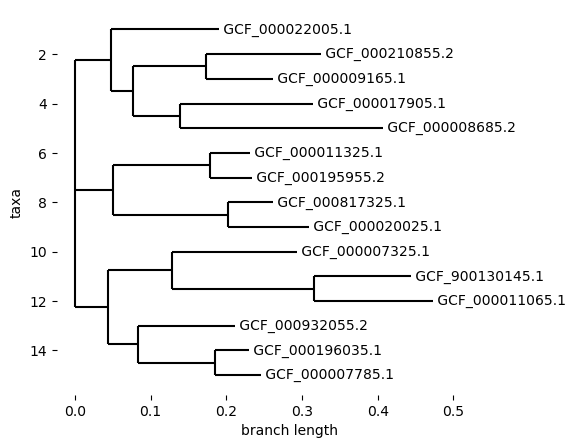

In [513]:
fig, ax = plt.subplots(figsize=(6,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
Phylo.draw(tree,show_confidence =False,axes=ax)
_ = ax.set_xticklabels([])
_ = ax.set_yticklabels([])

In [581]:
asm_ids = """GCF_000011325.1
GCF_000817325.1
GCF_000020025.1
GCF_000022005.1
GCF_000210855.2
GCF_000009165.1
GCF_000017905.1
GCF_000008685.2
GCF_000007325.1
GCF_900130145.1
GCF_000011065.1
GCF_000932055.2
GCF_000196035.1
GCF_000007785.1""".split("\n")

In [563]:
def transform(x):
    xs = []
    for s in x.split(" "):
        xs.append("$" + s + "$")
    return " ".join(xs)

In [564]:
fractions.loc[asm_ids,supports]

supports,"BATTER,RNIE,transterm","BATTER,RNIE","BATTER,transterm","RNIE,transterm",RNIE,transterm,BATTER
asm id,,,,,,,
GCF_000011325.1,0.462069,0.110345,0.020690,0.055172,0.144828,0.006897,0.200000
GCF_000195955.2,0.071429,0.142857,0.000000,0.000000,0.142857,0.000000,0.642857
GCF_000817325.1,0.281250,0.098214,0.031250,0.022321,0.111607,0.053571,0.401786
GCF_000020025.1,0.268182,0.086364,0.044545,0.044545,0.070000,0.054545,0.431818
GCF_000022005.1,0.490000,0.080000,0.050000,0.010000,0.050000,0.000000,0.320000
GCF_000210855.2,0.482587,0.049751,0.014925,0.014925,0.064677,0.024876,0.348259
GCF_000009165.1,0.317308,0.076923,0.038462,0.038462,0.038462,0.009615,0.480769
GCF_000017905.1,0.132075,0.037736,0.037736,0.037736,0.132075,0.245283,0.377358
GCF_000008685.2,0.361538,0.092308,0.023077,0.023077,0.007692,0.184615,0.307692


Text(0, 0.5, 'Spescies')

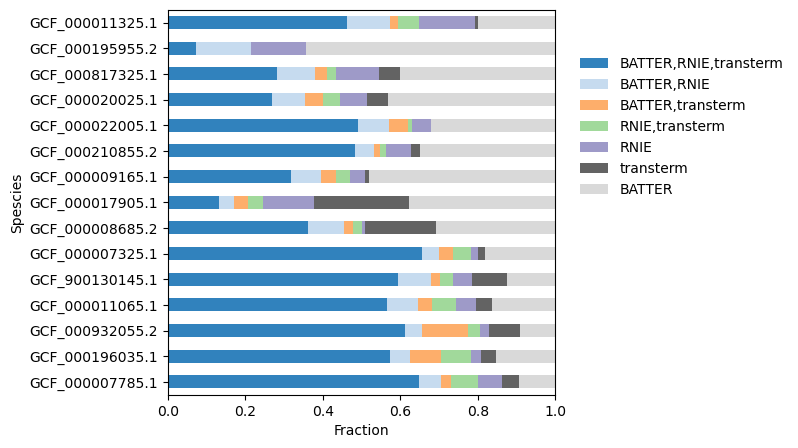

In [568]:
fig, ax = plt.subplots(figsize=(5,5))
fractions.loc[asm_ids[::-1],supports].plot.barh(stacked=True,cmap="tab20c",ax=ax)
ax.set_xlim([0,1])
#ticklabels = [transform(x.get_text()) for x in ax.get_yticklabels()]
#ax.set_yticklabels(ticklabels)
plt.legend(loc=(1.05,0.5),frameon=False)
ax.set_xlabel("Fraction")
ax.set_ylabel("Spescies")

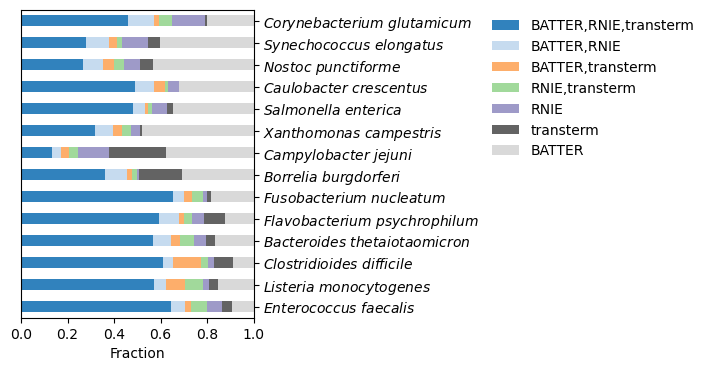

In [582]:
fig, ax = plt.subplots(figsize=(3,4))
fractions2 = fractions.loc[asm_ids[::-1],supports]
fractions2.index = fractions2.index.map(lambda x:asm_id2species[x])
fractions2.plot.barh(stacked=True,cmap="tab20c",ax=ax)
ax.set_xlim([0,1])
ticklabels = [transform(x.get_text()) for x in ax.get_yticklabels()]
ax.set_yticklabels(ticklabels)
plt.legend(loc=(2,0.5),frameon=False)
ax.set_xlabel("Fraction")
ax.set_ylabel("")
ax.yaxis.tick_right()
plt.savefig("figures/detectable-TES-fraction.pdf",bbox_inches="tight")

'Caulobacter crescentus'

In [644]:
pwd

'/BioII/lulab_b/jinyunfan/projects/terminator-prediction/performance-evaluation'